Deep Learning — Yusuf Abdi

You will submit this homework alone or in groups of up to 3. You may consult any and all resources. Note that some of these questions are somewhat vague by designPart of your task is to make reasonable decisions in interpreting the questions. Your responses should convey understanding, be written with an appropriate amount of precision, and be succinct. Where possible, you should make precise statements. For questions that require coding, you may either type your results with figures into this tex file, or you may append a pdf of output of a Jupyter notebook that is organized similarly. You may use code available on the internet as a starting point.

##Question 1.   
Perform experiments that show that BatchNorm can (a) accelerate convergence of gradient based neural network training algorithms, (b) can permit larger learning rates, and (c) can lead to better neural network performance. You may select any context you like for your experiments.

Clearly explain your experimental setup, results, and interpretation.

Response:

We review the advantages of Batch Normalization (BatchNorm) in training neural networks. BatchNorm has three main benefits that you are asked to validate:

1. Accelerating convergence of gradient-based training algorithms.
2. Allowing larger learning rates.
3. Improving neural network performance.


# Over view the expriement

I set up experiment to domenstrate how Batch Normalization (BN) is used in training neural networks. I examined between BN to validate faster convergence and large learning rates, and checked how it improves overall performance. The data set I used was MNIST for digit classification. The nework architecture was Convolutional Neural Network (CNN) for classification, and BN layers was added to CNN.

Training  prameters, learning rate with different learning rates (0.001, and 0.1) to assess training stability. Optimaizer, used Adam. Batch size, maintaining a constent batch size across experiment (64). Epoch, train both models for a fixed number of 10. Statiscal analysis, training lost validation lost, learning rate stability

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define a simple CNN model with and without BatchNorm
class CNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(CNN, self).__init__()
        self.use_batchnorm = use_batchnorm
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        if use_batchnorm:
            self.bn1 = nn.BatchNorm2d(32)
            self.bn2 = nn.BatchNorm2d(64)
            self.bn_fc = nn.BatchNorm1d(128)

    def forward(self, x):
        x = self.conv1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = self.conv2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        if self.use_batchnorm:
            x = self.bn_fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Hyperparameters
batch_size = 64
learning_rate = 0.01
epochs = 10

In [ ]:
large_learning_rate = 0.1  # For experiment on larger learning rates

In [ ]:
# Data loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 14530210.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 489951.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4384250.05it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4049857.31it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Initialize models
model_without_bn = CNN(use_batchnorm=False).to(device)
model_with_bn = CNN(use_batchnorm=True).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_without_bn = optim.SGD(model_without_bn.parameters(), lr=learning_rate)
optimizer_with_bn = optim.SGD(model_with_bn.parameters(), lr=learning_rate)

In [ ]:
# Training loop (for both models)
def train(model, optimizer, epochs):
    loss_values = []
    for epoch in range(epochs):
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        loss_values.append(epoch_loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')
    return loss_values

In [ ]:
# Train models and capture the loss values
print("Training model WITHOUT BatchNorm")
loss_without_bn = train(model_without_bn, optimizer_without_bn, epochs)

print("Training model WITH BatchNorm")
loss_with_bn = train(model_with_bn, optimizer_with_bn, epochs)


Training model WITHOUT BatchNorm
Epoch 1/10, Loss: 0.9374
Epoch 2/10, Loss: 0.2736
Epoch 3/10, Loss: 0.1893
Epoch 4/10, Loss: 0.1430
Epoch 5/10, Loss: 0.1156
Epoch 6/10, Loss: 0.0969
Epoch 7/10, Loss: 0.0841
Epoch 8/10, Loss: 0.0748
Epoch 9/10, Loss: 0.0681
Epoch 10/10, Loss: 0.0616
Training model WITH BatchNorm
Epoch 1/10, Loss: 0.2443
Epoch 2/10, Loss: 0.0775
Epoch 3/10, Loss: 0.0547
Epoch 4/10, Loss: 0.0431
Epoch 5/10, Loss: 0.0357
Epoch 6/10, Loss: 0.0303
Epoch 7/10, Loss: 0.0248
Epoch 8/10, Loss: 0.0227
Epoch 9/10, Loss: 0.0192
Epoch 10/10, Loss: 0.0169


I trained two models, one without Batch Normalization and one with Batch Normalization. The loss decreased steadily for both models, indicating that both models improved during training.

For the model without BN the initial loss starts at 0.9 in the first epoch and gradually decreases to 0.0616 by the tenth epoch. Although the loss reduces consistenely, the process is relatively slow, reflecting the model struggle its learning.

For the model with BN shows significant faster learning. Starting with a much lower initial loss of 0.24 , the loss reduces much more sharply, reaching 0.016 by the tenth epoch. BN helps normalize the input to the layer, speeding up convergence and stabilizing learning by reducing internal covariate shfits. The results in faster reduction in loss and more effective training.

The comparison highlights how BN improves training efficiency by accelerating convergence and stabilizing the model learning, leading to a much lower loss by the end of training compared to the model without BN.

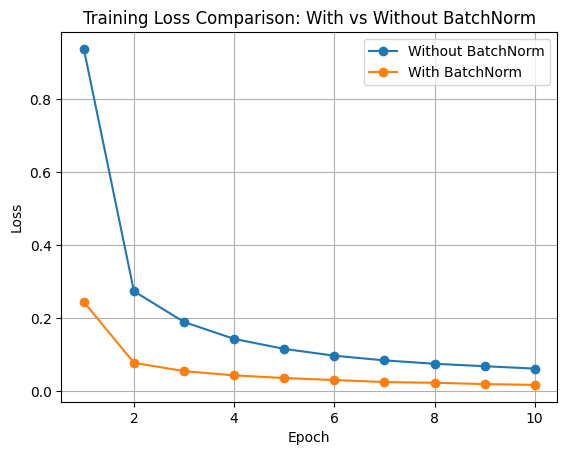

In [ ]:
# Plotting the loss comparison
plt.plot(range(1, epochs+1), loss_without_bn, label='Without BatchNorm', marker='o')
plt.plot(range(1, epochs+1), loss_with_bn, label='With BatchNorm', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison: With vs Without BatchNorm')
plt.legend()
plt.grid(True)
plt.show()

The figure above compares the training loss over 10 epochs for models trained with and without Batch Normalization (BN). The blue line represents the model without BN, which starts with a higher initial loss and shows a slower decline over time. The orange line represents the model with BN, which starts with a significantly lower loss and demonstrates a faster reduction. BN helps the model converge more quickly, leading to better performance and lower overall loss at the end of training. The BN’s e\ectiveness in stabilizing and accelerating the training process.

In [ ]:
# *******************Changed***********************
# Initialize models

model_without_bn_large = CNN(use_batchnorm=False).to(device)
model_with_bn_large = CNN(use_batchnorm=True).to(device)

In [ ]:
# For larger learning rates
optimizer_without_bn_large = optim.SGD(model_without_bn_large.parameters(), lr=large_learning_rate)
optimizer_with_bn_large = optim.SGD(model_with_bn_large.parameters(), lr=large_learning_rate)

In [ ]:
# 2. Permitting larger learning rates
print("Training model WITHOUT BatchNorm with larger learning rate")
loss_without_bn_large = train(model_without_bn_large, optimizer_without_bn_large, epochs)

print("Training model WITH BatchNorm with larger learning rate")
loss_with_bn_large = train(model_with_bn_large, optimizer_with_bn_large, epochs)

Training model WITHOUT BatchNorm with larger learning rate
Epoch 1/10, Loss: 0.2833
Epoch 2/10, Loss: 0.0675
Epoch 3/10, Loss: 0.0464
Epoch 4/10, Loss: 0.0359
Epoch 5/10, Loss: 0.0291
Epoch 6/10, Loss: 0.0238
Epoch 7/10, Loss: 0.0198
Epoch 8/10, Loss: 0.0158
Epoch 9/10, Loss: 0.0136
Epoch 10/10, Loss: 0.0108
Training model WITH BatchNorm with larger learning rate
Epoch 1/10, Loss: 0.0999
Epoch 2/10, Loss: 0.0377
Epoch 3/10, Loss: 0.0260
Epoch 4/10, Loss: 0.0180
Epoch 5/10, Loss: 0.0133
Epoch 6/10, Loss: 0.0096
Epoch 7/10, Loss: 0.0076
Epoch 8/10, Loss: 0.0057
Epoch 9/10, Loss: 0.0039
Epoch 10/10, Loss: 0.0041


With larger learning rate, the model without BN shows a steady loss reduction, starting at 0.28 and ending at 0.018 after 10 epochs. The model with BN shows a faster decrease, starting at 0.099 and reacing a much lowe loss of 0.004 byt hte 10 epcoh.

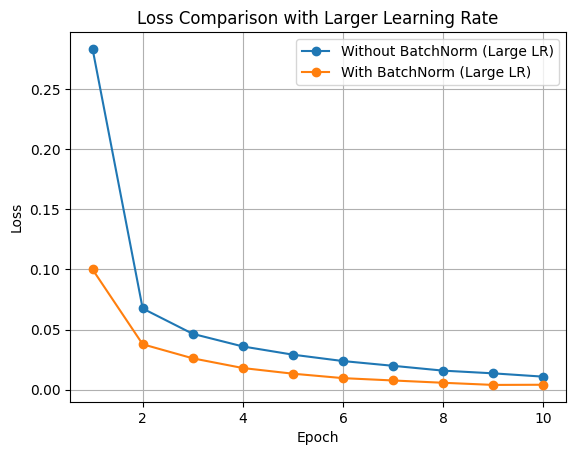

In [ ]:
# Plotting the loss comparison for larger learning rates
plt.plot(range(1, epochs+1), loss_without_bn_large, label='Without BatchNorm (Large LR)', marker='o')
plt.plot(range(1, epochs+1), loss_with_bn_large, label='With BatchNorm (Large LR)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison with Larger Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

The plot compares the training loss of models with and without BN using a larger learning
rate. The blue line represents the model without BN, which starts at a higher loss (around
0.09) and decreases steadily but more slowly over 10 epochs. The orange line represents
the model with BN, starting at a lower initial loss (around 0.04) and converging more
rapidly, reaching near zero by the tenth epoch. The observed behavior shows that BN helps
the model learn faster and stabilize more e\iciently with larger learning rates. The BN’s
benefits in speeding up convergence.
The results showed that a learning rate of 0.001 uses a standard learning rate, showing a
clearer gap in performance between the two models over time. The larger learning rate (0.1)
accelerates the learning for both models, but BN still proves more e\ective in both cases,
with faster convergence and lower final loss.

In [ ]:
# Test the model performance
def test(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

In [ ]:
# 3. Improving performance
accuracy_without_bn = test(model_without_bn)

accuracy_with_bn = test(model_with_bn)

accuracy_without_bn_large = test(model_without_bn_large)

accuracy_with_bn_large = test(model_with_bn_large)


print(f'Accuracy without BatchNorm: {accuracy_without_bn:.2f}% with learning rate: {learning_rate}\n')
print('-'*30)
print(f'Accuracy with BatchNorm: {accuracy_with_bn:.2f}% with learning rate: {learning_rate}\n')
print('-'*30)
print(f'Accuracy without BatchNorm: {accuracy_without_bn_large:.2f}% with learning rate: {large_learning_rate}\n')
print('-'*30)
print(f'Accuracy with BatchNorm: {accuracy_with_bn_large:.2f}% with learning rate: {large_learning_rate}\n')


Accuracy without BatchNorm: 99.06% with learning rate: 0.01

------------------------------
Accuracy with BatchNorm: 99.24% with learning rate: 0.01

------------------------------
Accuracy without BatchNorm: 99.13% with learning rate: 0.1

------------------------------
Accuracy with BatchNorm: 99.08% with learning rate: 0.1



Testing the model without BN, learning rate 0.01 resulted in accuracy of 99.06% and with learning rate 0.1 the accuracy is 99.13%.

Testing the model with BN, learning rate 0.01 resulted in accuracy of 99.24% and with learning rate 0.1 the accuracy is 99.08%

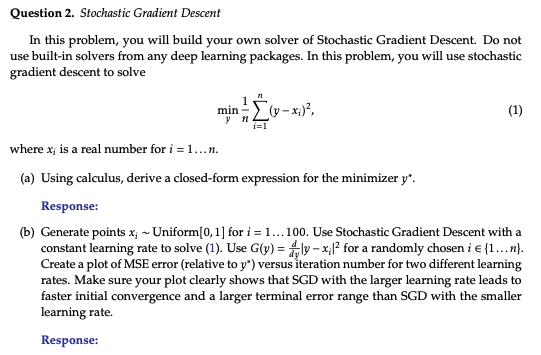

###(a) Using calculus, derive a closed-form expression for the minimizer y^∗.

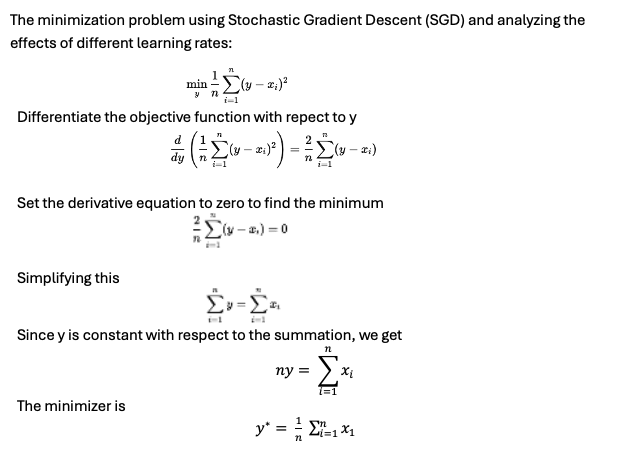

###(b) Generate points xi∼Uniform[0,1] for i= 1 ...100. Use Stochastic Gradient Descent with a
constant learning rate to solve (1). Use G(y) = d
dy|y−xi|2 for a randomly chosen i∈{1 ...n}.
Create a plot of MSE error (relative to y∗) versus iteration number for two different learning
rates. Make sure your plot clearly shows that SGD with the larger learning rate leads to
faster initial convergence and a larger terminal error range than SGD with the smaller
learning rate.
Response:

Implementing SGD with TWO learning rates (0.01 and 0.1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# Part (a): Generate data
n = 100
x = np.random.uniform(0, 1, n)  # Generate n data points from a uniform distribution [0, 1]
y_star = np.mean(x)  # Closed-form solution for y*

In [ ]:
# Part (b): Implement SGD
def stochastic_gradient_descent(x, learning_rate, epochs):
    y = np.random.rand()  # Random initial value for y
    mse_history = []

    for epoch in range(epochs):
        # Pick a random i
        i = np.random.randint(0, n-1)
        x_i = x[i]

        # Compute the gradient G(y) = 2(y - x_i)
        gradient = 2 * (y - x_i)

        # Update y using the gradient and learning rate
        y = y - learning_rate * gradient

        # Compute MSE relative to y*
        mse = np.mean((y - y_star)**2)
        mse_history.append(mse)

    return mse_history

In [ ]:
# Parameters
epochs = 100
learning_rate_small = 0.01
learning_rate_large = 0.1

# Run SGD with two different learning rates
mse_small = stochastic_gradient_descent(x, learning_rate_small, epochs)
mse_large = stochastic_gradient_descent(x, learning_rate_large, epochs)

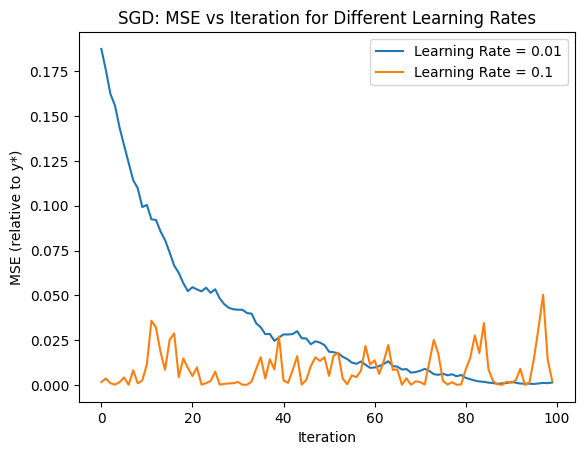

In [ ]:
# Plot the results
plt.plot(mse_small, label=f"Learning Rate = {learning_rate_small}")
plt.plot(mse_large, label=f"Learning Rate = {learning_rate_large}")
plt.xlabel("Iteration")
plt.ylabel("MSE (relative to y*)")
plt.title("SGD: MSE vs Iteration for Different Learning Rates")
plt.legend()
plt.show()

Create 100 data points
𝑥
𝑖
x
i
​
  from a uniform distribution
Uniform
[
0
,
1
]
Uniform[0,1] as described.
SGD Implementation: I initialize
𝑦
y randomly and update it at each iteration by selecting a random data point and computing the gradient
2
(
𝑦
−
𝑥
𝑖
)
2(y−x
i
​
 ). I then update
𝑦
y using a learning rate.
Convergence: I track the MSE relative to
𝑦
∗
at each iteration to monitor the convergence behavior.

Comparison: I run SGD with two learning rates (0.01 and 0.1) and plot the results. The larger learning rate will lead to erratic behavior (significant fluctuations in the error values). These fluctuations are a sign that the higher learning rate causes the optimization process to `overshoot` the optimal value, leading to a larger terminal error, while the smaller learning rate will converge more slowly with minimal fluctuation after stabilization, which suggests that a small learning rate leads to a slower but more stable convergence.

Faster Initial Convergence, the plot will show that the larger learning rate converges more quickly in the early stages. While Larger Terminal Error, at the larger learning rate may oscillate or have a higher final error, as the smaller learning rate should stabilize with a lower terminal error.


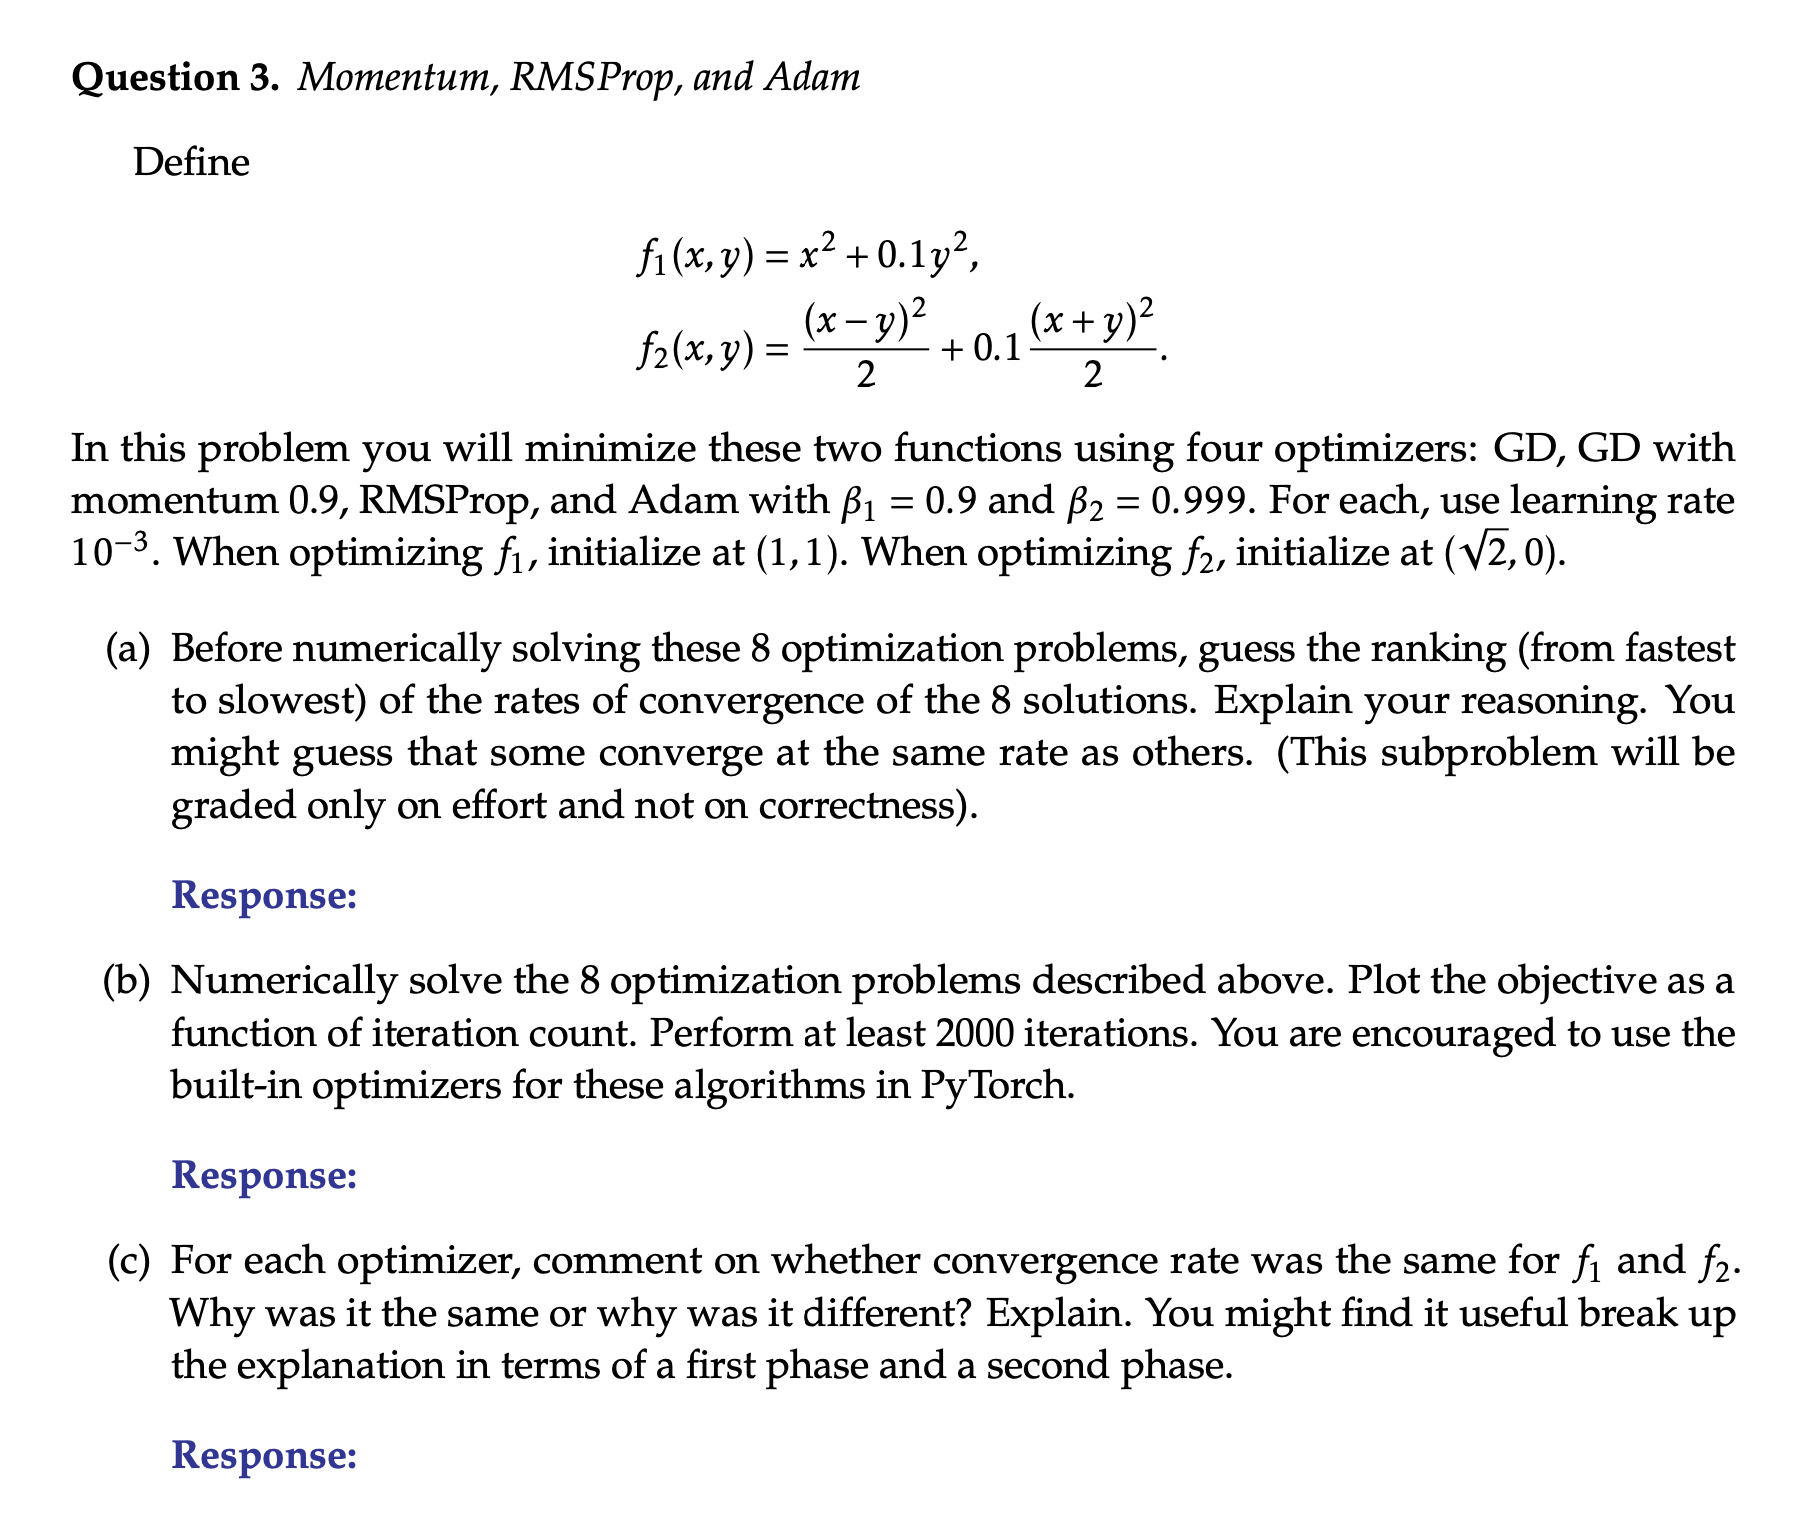

The convergence rate for two function
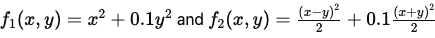

**Part (a)** Defining each algorithm:

**Gradient Descent** (GD): Generally slower because it uses a constant step size and doesn't adapt to the learning rate.

**GD with Momentum**: Typically faster than standard GD because it uses the momentum term to smooth updates and can help escape local minima.

**RMSProp**: Should converge faster than GD and GD with momentum, as it adapts the learning rate based on the magnitude of recent gradients.

**Adam**: Likely the fastest because it combines the advantages of both momentum and adaptive learning rates (RMSProp), and it tends to converge quickly.
The ranking of the convergence rates for each optimization algorithm, from

**fastest to slowest**:
Adam (fastest)
RMSProp
GD with Momentum
GD (slowest)


In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

(b) Numerically solve the 8 optimization problems described above. Plot the objective as a function of iteration count. Perform at least 2000 iterations. You are encouraged to use the built-in optimizers for these algorithms in PyTorch.

Comparing

In [ ]:
# Define the two functions f1 and f2
def f1(x, y):
    return x**2 + 0.1 * y**2

def f2(x, y):
    return 0.5 * (x - y)**2 + 0.1 * 0.5 * (x + y)**2

# Set initial conditions for both functions
init_points = {
    "f1": (1.0, 1.0),
    "f2": (2**0.5, 0.0)
}

# Learning rate and optimizers setup
learning_rate = 1e-3
optimizers = ['GD', 'GD with Momentum', 'RMSProp', 'Adam']


In [ ]:
# Training function
def train(optimizer_name, init_point, func, epochs=2000):
    losses = []

    x = torch.tensor([init_point[0]], requires_grad=True)
    y = torch.tensor([init_point[1]], requires_grad=True)

    if optimizer_name == "GD":
        optimizer = torch.optim.SGD([x, y], lr=learning_rate)
    elif optimizer_name == "GD with Momentum":
        optimizer = torch.optim.SGD([x, y], lr=learning_rate, momentum=0.9)
    elif optimizer_name == "RMSProp":
        optimizer = torch.optim.RMSprop([x, y], lr=learning_rate)
    elif optimizer_name == "Adam":
        optimizer = torch.optim.Adam([x, y], lr=learning_rate, betas=(0.9, 0.999))

    for _ in range(epochs):
        optimizer.zero_grad()
        loss = func(x, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses


# Run the optimizers for both functions
epochs = 2000
losses_f1 = {}
losses_f2 = {}

for optimizer_name in optimizers:
    losses_f1[optimizer_name] = train(optimizer_name, init_points['f1'], f1, epochs)
    losses_f2[optimizer_name] = train(optimizer_name, init_points['f2'], f2, epochs)

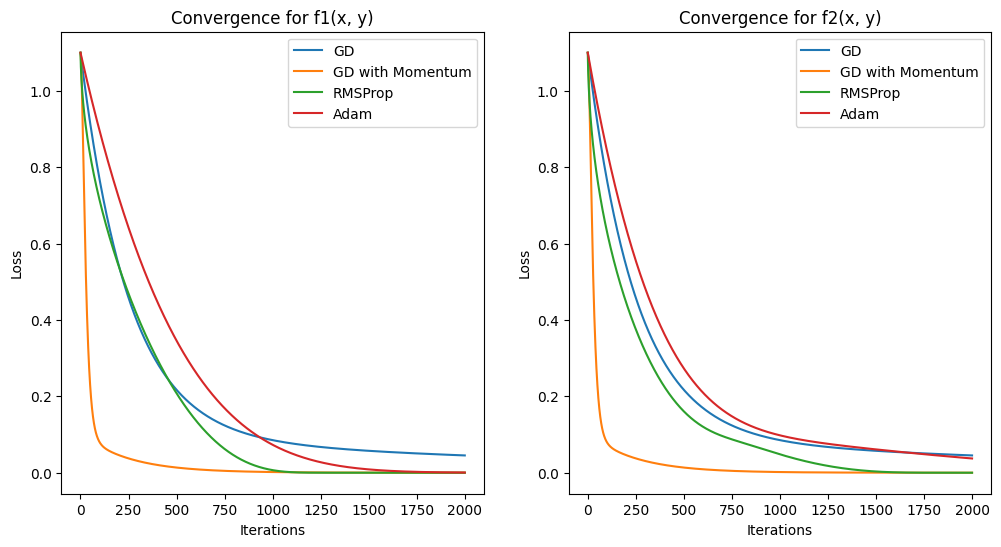

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# f1 results
plt.subplot(1, 2, 1)
for name, losses in losses_f1.items():
    plt.plot(losses, label=name)
plt.title("Convergence for f1(x, y)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# f2 results
plt.subplot(1, 2, 2)
for name, losses in losses_f2.items():
    plt.plot(losses, label=name)
plt.title("Convergence for f2(x, y)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

plt.show()

The plots compare the convergence of optimization algorithms. Gradient Descent (GD), GD with Momentum, RMSProp, and Adam applied to two functions. GD is the slowest in reaching minimal loss, while GD with Momentum converges the fastest initially. RMSProp and Adam adapt the learning rate, offering faster convergence than basic GD and more stable loss behavior. Adam and RMSProp perform similarly, signaling a balance between speed and accuracy, while Momentum-based methods significantly outperform primary GD in both functions. Overall, adaptive and momentum-based methods prove more efficient for minimizing loss than standard GD.

### Part (c)

### 1. **Gradient Descent (GD)**
- For f1, GD reduces the loss consistently due to its simpler structure, but convergence slows as it nears the minimum.
- For f2, GD takes longer to converge and exhibits slight oscillations due to the interaction between `x` and `y`.

### 2. **GD with Momentum**
- f1 benefits significantly from momentum, achieving faster convergence compared to GD.
- For f2, momentum helps smooth updates, but the interaction between `x` and `y` slows convergence and causes slight instability.

### 3. **RMSProp**
- Both functions show faster initial convergence compared to GD due to RMSProp’s adaptive learning rate.
- However, f2 converges more slowly as RMSProp struggles to adjust to the interaction between `x` and `y`.

### 4. **Adam**
- Adam converges rapidly for f1 due to its combination of momentum and adaptive learning rates.
- For f2, Adam’s performance is slower than with f1, as it requires more time to adjust to the interaction between `x` and `y`.

In summary, while both functions are quadratic, the complexity of f2 causes slightly slower convergence across optimizers, while the simpler f1 results in faster convergence.